# **💘 Speed Dating Experiment Analysis 💘**

The marketing team at Tinder is looking to address a recent decline in the number of matches on the platform. To better understand what drives mutual interest between people, they conducted a speed dating experiment to gather rich behavioral and preference-based data.

In this experiment, participants provided detailed information that could be used to enrich their dating profiles. Each row in the dataset represents a single speed date interaction between two individuals and indicates whether each person wanted to go on a second date.

During the event, attendees went on a series of four-minute “first dates” with members of the opposite sex. After each mini-date, they recorded whether they wanted to meet the person again and rated them on six key traits: Attractiveness, Sincerity, Intelligence, Fun, Ambition, Shared Interests

In addition to these evaluations, participants filled out questionnaires at various stages. The dataset includes a wide range of variables covering: Demographics (age, gender, race, education, income), Dating goals and habits, Self-assessments of their own personality and traits, Beliefs about what others look for in a partner, Lifestyle indicators and background

🎯 **Project Objective:**

- The goal of this project is to explore the key drivers of romantic interest and mutual attraction using real-world speed dating data. By analyzing this information, we aim to uncover what makes people say “yes” to a second date and what predicts a successful match.

We will structure the project in four main steps:

**Step 1: Exploring and cleaning the dataset**
* Inspect raw dataset, clean and standardize accordingly

**Step 2: Describing the participants's socio-demographic characteristics**
* Quick assessment of participants' age, gender, race, dating habits and goals prior to the dating event

**Step 3: Identifying relevant associations through EDA**
* Identify, describe and visualize relationships between variables

**Step 4: Overall interpretation**
* Interpret the results of this analysis 



## 🧹 Step 1: Exploring and cleaning the dataset

In [3]:
# Import relevant libraries 
import plotly.io as pio
import pandas as pd
import plotly.express as px
#!pip install -U kaleido


# Set no limit in number of columns displayed
pd.options.display.max_columns = None

# Define constant values:
HEIGHT = 400
WIDTH = 800


In [4]:
# Read the file and conduct quick inspection
df = pd.read_csv("Speed+Dating+Data.csv", encoding="latin1")
print(f"The shape of the raw dataset is {df.shape}")
display(df.head())

The shape of the raw dataset is (8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [5]:
# Summary statistics
display(df.describe(include = 'all'))
print(f"There was a total of {df['iid'].nunique()} individuals who participated in the experiment.")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There was a total of 551 individuals who participated in the experiment.


**Decision:**
- For a small set of variables with clearly defined upper bounds, such as reading, gaming, fun_o, and attr_o, we observed that a few entries exceeded their expected maximum values (e.g., values >10 on a 0–10 or 1–10 scale).
Since these outlier values are likely due to data entry errors or participant misunderstanding, we applied a conservative cleaning approach:

- We capped values at the documented maximum (e.g., setting a score of 13 to 10) rather than removing or rescaling them.

- We did not alter values below the minimum, as they were not present or not a concern in this case.

- This ensures scale consistency while preserving participant responses within valid bounds.

In [6]:
# Define expected max values for specific variables (ignore min for now)
expected_ranges = {
    'reading': (0, 10),
    'gaming': (0, 10),
    'fun_o': (1, 10),
    'attr_o': (1, 10),
}

validation_results = []

for col, (min_val, max_val) in expected_ranges.items():
    if col in df.columns:
        over_max = df[col] > max_val

        if over_max.any():
            # Log over-max issues
            validation_results.append({
                'column': col,
                'max_expected': max_val,
                'max_actual': df[col].max(),
                'over_max_count': over_max.sum()
            })

            # Cap values at the expected max
            df[col] = df[col].clip(upper=max_val)

validation_issues = pd.DataFrame(validation_results)


In [7]:
validation_issues

,column,max_expected,max_actual,over_max_count
0,reading,10,13.0,51
1,gaming,10,14.0,78
2,fun_o,10,11.0,1
3,attr_o,10,10.5,1


#### Dealing with missing values

In [8]:
# Calculate the threshold for missing values (50% of total rows)
threshold = 0.5 * len(df)

# Identify columns with 50% or more missing values
columns_with_high_missing = df.columns[df.isna().sum() >= threshold]

# Display the columns with their corresponding % of missingness
percent_missing = df.isnull().sum() * 100 / len(df)
highmissing_df = percent_missing[percent_missing >= 50].sort_values(ascending=False).reset_index()
highmissing_df.columns = ['column', 'percent_missing']

# Show and save
print(highmissing_df.to_string(index=False))
highmissing_df.to_csv("high_missing_columns.csv", index=False)


  column  percent_missing
num_in_3        92.026737
numdat_3        82.143710
  expnum        78.515159
 sinc7_2        76.665075
  amb7_2        76.665075
 shar7_2        76.438291
  fun7_2        76.318931
intel7_2        76.318931
 attr7_2        76.318931
intel7_3        75.936978
  fun7_3        75.936978
 shar2_3        75.936978
intel5_3        75.936978
  amb7_3        75.936978
 shar7_3        75.936978
 sinc5_3        75.936978
 attr5_3        75.936978
  fun5_3        75.936978
  amb5_3        75.936978
 attr7_3        75.936978
 sinc7_3        75.936978
  fun4_3        64.681308
intel4_3        64.681308
 attr4_3        64.681308
 sinc4_3        64.681308
  fun2_3        64.681308
 sinc2_3        64.681308
 shar4_3        64.681308
  amb4_3        64.681308
  amb2_3        64.681308
 attr2_3        64.681308
intel2_3        64.681308
  mn_sat        62.604440
 tuition        57.233230
intel1_3        52.566245
 shar1_3        52.566245
  amb1_3        52.566245
  fun1_3    

**Decision:**
- We removed follow-up rating columns (Time 2 and Time 3) and sparse post-event variables (e.g., num_in_3, numdat_3) due to high missingness and limited relevance to our analysis. Including these would reduce the usable sample size and potentially skew results if the data is not missing at random.

- The column expnum, although missing in approximately 78% of cases, was retained due to its direct relevance to one of our research questions, which explores participants' expectations before the event. We acknowledge that this analysis will be limited to a smaller subset of participants and results should be interpreted with caution.

In [9]:
# Define suffixes to drop (mostly follow-up ratings and sparse post-surveys)
suffixes_to_drop = ('7_2', '7_3', '5_3', '2_3', '4_3', '1_3', '3_s', '1_s')

# Drop columns that end with any of the above suffixes
cols_by_suffix = [col for col in df.columns if col.endswith(suffixes_to_drop)]

# Columns with both high high-missingness and irrelevance to analysis
manual_drop = ['num_in_3', 'numdat_3', 'mn_sat', 'tuition', 'you_call']

# Combine and drop
to_drop = list(set(cols_by_suffix + manual_drop))  # Remove duplicates just in case
df = df.drop(columns=to_drop)

In [10]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'intel5_2', 'fun5_2', 'amb5_2', 'them_cal', 'date_3', 'attr3_3',
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3'],
      dtype='object', length=144)

#### Dealing with different rating scales

**Trait importance ratings were collected using two different methods:**

- Waves 1–5, 10–21: 100-point allocation across traits

- Waves 6–9: Individual 1–10 ratings per trait

-> Let's inspect the max values for each ratings per wave to address any inconsistencies.

In [11]:
# Generate a summary table of max values for each ratings per wave for inspection
rating_prefixes = ('attr', 'sinc', 'intel', 'fun', 'amb', 'shar')
rating_cols = [col for col in df.columns if col.startswith(rating_prefixes)]

rating_stats = df.groupby('wave')[rating_cols].agg('max')

rating_stats.reset_index()

,wave,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
0,1,10.0,10.0,10.0,10.0,10.0,10.0,100.00,25.00,35.00,40.00,18.18,22.22,NaN,NaN,NaN,NaN,NaN,NaN,65.00,20.00,30.00,30.00,25.00,20.00,10.0,9.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,35.71,25.64,22.22,28.57,15.79,21.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,9.0,9.0,10.0,9.0,10.0
1,2,10.0,10.0,10.0,10.0,10.0,10.0,50.00,35.00,50.00,30.00,25.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN,95.00,30.00,30.00,30.00,30.00,20.00,8.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,75.00,30.00,30.00,40.00,20.00,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,8.0,10.0,10.0,9.0,9.0
2,3,10.0,10.0,10.0,10.0,10.0,10.0,60.00,25.00,45.00,30.00,53.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN,80.00,20.00,40.00,30.00,20.00,20.00,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,70.00,20.00,30.00,50.00,20.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,10.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,9.0,10.0,9.0,10.0,9.0
3,4,10.0,10.0,10.0,10.0,10.0,10.0,50.00,32.00,50.00,24.00,20.00,30.00,NaN,NaN,NaN,NaN,NaN,NaN,65.00,30.00,30.00,30.00,30.00,25.00,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,55.00,30.00,40.00,40.00,20.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0
4,5,10.0,10.0,10.0,10.0,10.0,10.0,80.00,40.00,35.00,35.00,20.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN,70.00,50.00,20.00,30.00,20.00,20.00,9.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,80.00,20.00,40.00,30.00,15.00,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,9.0,10.0,10.0,10.0,9.0
5,6,10.0,10.0,10.0,10.0,10.0,10.0,20.83,22.73,20.00,20.83,20.00,19.57,10.0,9.0,9.0,9.0,9.0,9.0,24.32,19.61,19.05,23.81,21.43,19.15,9.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,21.43,22.22,20.00,21.43,18.00,18.00,10.0,10.0,10.0,9.0,9.0,8.0,22.50,19.61,18.37,20.00,17.31,18.87,9.0,10.0,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,9.0,12.0,12.0,12.0,12.0
6,7,10.0,10.0,10.0,10.0,10.0,10.0,27.78,23.08,22.73,27.78,19.57,19.57,10.0,9.0,9.0,10.0,9.0,10.0,28.57,20.45,20.45,25.00,20.00,19.51,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,25.00,21.95,23.81,25.00,18.75,19.57,10.0,9.0,9.0,9.0,9.0,9.0,23.81,20.00,20.45,20.93,21.28,20.00,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,12.0,12.0,12.0,12.0,12.0
7,8,10.0,10.0,10.0,10.0,10.0,10.0,20.93,23.81,23.26,22.50,20.41,17.39,10.0,10.0,10.0,10.0,10.0,10.0,26.32,21.05,21.05,26.32,21.05,19.51,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,21.43,23.81,25.00,23.26,18.87,18.37,10.0,9.0,9.0,10.0,9.0,9.0,27.03,19.15,21.05,24.39,20.93,19.15,9.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,9.0,9.0,12.0,9.0,12.0
8,9,10.0,10.0,10.0,10.0,10.0,10.0,25.64,23.81,23.81,23.81,20.59,23.81,10.0,10.0,10.0,10.0,10.0,10.0,31.25,23.26,20.51,31.25,24.14,22.22,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,26.32,22.22,25.00,21.05,22.22,22.50,10.0,10.0,10.0,10.0,9.0,10.0,38.46,20.51,30.77,21.74,22.22,19.15,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,12.0,12.0,12.0,12.0,12.0
9,10,10.0,10.0,10.0,10.0,10.0,10.0,90.00,30.00,30.00,25.00,20.00,25.00,45.0,35.0,30.0,30.0,20.0,20.0,90.00,25.00,30.00,30.00,25.00,20.00,10.0,10.0,10.0,10.0,10.0,10.0,10.

In [12]:
rating_stats.to_csv("rating_stats.csv", index=False)

In [13]:
# Based on the documentation, these are the ratings that are on a 10pt scale for waves 6-9
columns_to_normalize = [
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
    'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
    'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 
    'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2'
]

# Let's double check if this is indeed the case, max val should equal 10 for each of the rating
df.loc[df['wave'].isin([6, 7, 8, 9]), columns_to_normalize].describe()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2
count,1557.000000,1557.00000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000
mean,16.158304,17.82194,18.990886,17.910328,14.733789,14.386532,8.638407,7.030829,6.872832,8.077714,6.414258,6.886962,19.315883,16.208324,15.823237,18.738163,14.857514,15.060745,17.452725,17.358670,18.793813,17.344857,14.653126,14.399599
std,3.515382,2.75362,1.993004,2.440198,4.180549,3.946962,1.141478,1.730291,1.789146,1.384266,2.281281,1.918672,4.463158,3.150199,2.793401,2.929037,3.784809,2.940706,2.960726,2.871105,2.037290,2.323435,3.709466,3.377109
min,6.670000,5.13000,14.710000,12.500000,2.330000,2.270000,5.000000,3.000000,2.000000,4.000000,1.000000,1.000000,9.090000,6.900000,7.140000,11.900000,2.780000,2.630000,10.000000,5.000000,13.950000,11.110000,2.500000,4.760000
25%,14.290000,16.67000,17.390000,16.670000,13.040000,12.500000,8.000000,6.000000,6.000000,7.000000,5.000000,6.000000,15.690000,14.630000,14.290000,16.670000,13.640000,13.040000,15.380000,16.070000,17.390000,15.690000,12.770000,12.960000
50%,16.000000,17.78000,18.870000,17.950000,15.690000,14.890000,9.000000,7.000000,7.000000,8.000000,7.000000,7.000000,18.870000,16.280000,15.690000,18.420000,15.220000,15.560000,16.670000,17.650000,18.520000,17.780000,15.380000,14.580000
75%,18.000000,19.44000,20.000000,19.230000,17.780000,17.070000,10.000000,8.000000,8.000000,9.000000,8.000000,8.000000,22.500000,18.420000,18.000000,20.000000,17.310000,17.020000,19.050000,19.150000,20.000000,18.750000,16.670000,16.670000
max,27.780000,23.81000,23.810000,27.780000,20.590000,23.810000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,31.250000,23.260000,21.050000,31.250000,24.140000,22.220000,26.320000,23.810000,25.000000,25.000000,22.220000,22.500000


**Decision to exclude waves 6-9:**

- During the data review, we identified fundamental inconsistencies in how participants from waves 6–9 responded to key trait preference questions.

- Although the documentation specifies that waves 6–9 were instructed to rate each attribute on a 1–10 scale, nearly all participants in these waves entered values well beyond that range — in some cases, up to 30+. This widespread non-compliance indicates that participants did not follow the intended scale, and may have used a 100-point allocation logic instead.

- Additionally, waves 6–9 differ from the rest of the dataset in a critical way:

-> They used an absolute rating scale (1–10)

-> While all other waves (1–5 and 10–21) used a relative allocation scale (distribute 100 points across traits).

- These two measurement formats are not comparable, as they reflect different cognitive processes:

-> A 100-point allocation requires trade-offs (higher weight on one trait means less for others),

-> A 1–10 scale allows participants to rate all traits highly or equally, removing trade-offs.

- Because of the dual issues of systematic misuse of the rating scale (out-of-bounds values), and inherent incompatibility of the rating system with the rest of the dataset, we chose to exclude participants from waves 6–9 from our analysis.

- This ensures that all trait-related variables (e.g., preferences, self-ratings, perceived partner attributes) are measured consistently and reliably, and avoids introducing noise or misleading patterns from incomparable data.

In [14]:
# Remove rows from waves 6–9
waves_to_exclude = [6, 7, 8, 9]
df = df[~df['wave'].isin(waves_to_exclude)].reset_index(drop=True)

print(f"Remaining rows after removing waves 6–9: {len(df)}")

Remaining rows after removing waves 6–9: 6816


#### Data Standardization

In [15]:
# Mapping dictionaries

gender_mapping = {0: 'Female', 1: 'Male'}

race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}
goal_mapping = {
    1: 'Fun night out',
    2: 'Meet new people',
    3: 'Get a date',
    4: 'Serious relationship',
    5: 'To say I did it',
    6: 'Other'
}
date_freq_mapping = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}
field_cd_mapping = {
    1: 'Law',
    2: 'Math',
    3: 'Social Science/Psychology',
    4: 'Medical Science/Pharma/BioTech',
    5: 'Engineering',
    6: 'English/Creative Writing/Journalism',
    7: 'History/Religion/Philosophy',
    8: 'Business/Econ/Finance',
    9: 'Education/Academia',
    10: 'Bio/Chem/Physics',
    11: 'Social Work',
    12: 'Undergrad/Undecided',
    13: 'Political Science/Intl Affairs',
    14: 'Film',
    15: 'Fine Arts/Arts Admin',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
}
career_c_mapping = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Finance/Business/Admin',
    8: 'Real Estate',
    9: 'Intl/Humanitarian',
    10: 'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro Sports',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'
}

# Apply mapping to new categorical columns

df['gender_cat'] = df['gender'].map(gender_mapping)
df['race_cat'] = df['race'].map(race_mapping)
df['goal_cat'] = df['goal'].map(goal_mapping)
df['date_cat'] = df['date'].map(date_freq_mapping)
df['go_out_cat'] = df['go_out'].map(date_freq_mapping)
df['field_cat'] = df['field_cd'].map(field_cd_mapping)
df['career_cat'] = df['career_c'].map(career_c_mapping)

## 👫 Step 2: Getting to know the participants


Let's first describe participants' socio-demographic characteristics 

In [16]:
display(df['age'].describe())

count    6726.000000
mean       26.281742
std         3.586325
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

In [15]:
import os

# Create the images folder if it doesn't exist
os.makedirs("images", exist_ok=True)

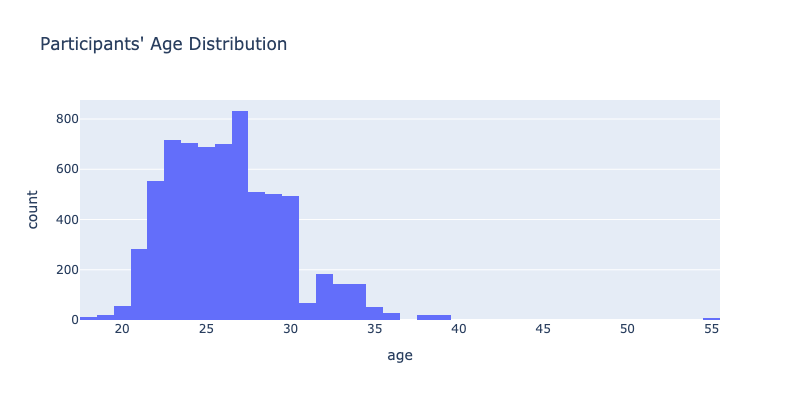

In [19]:
from IPython.display import Image

fig1=px.histogram(df, x = 'age', width = WIDTH, height = HEIGHT, nbins = 50, title= "Participants' Age Distribution")
#fig1.show()
fig2=px.histogram(df, x = 'age', width = WIDTH, height = HEIGHT, nbins = 50, color = 'gender_cat', title= "Participants' Age by Gender Distribution")
#fig2.show()

fig1.write_image("images/age_distribution.png", width = WIDTH, height = HEIGHT)
Image(filename="images/age_distribution.png")


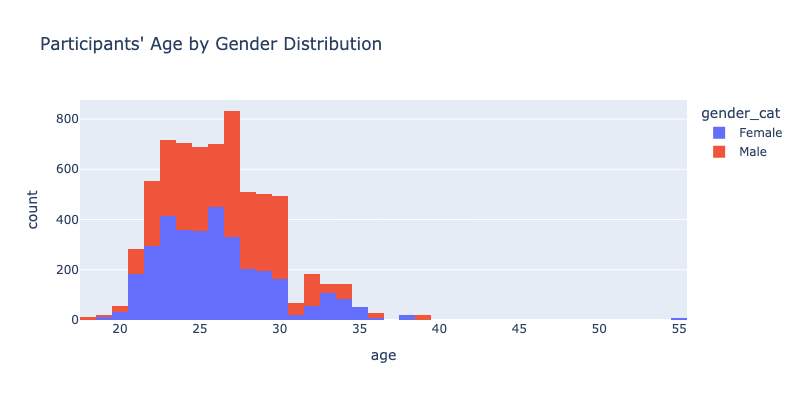

In [18]:
fig2.write_image("images/age_distribution_bygender.png", width = WIDTH, height = HEIGHT)
Image(filename="images/age_distribution_bygender.png")

In [20]:
# Describe participants' gender

# Get the counts and proportions for each gender
grouped_gender_cat = df.groupby('gender_cat')['iid'].nunique().reset_index()
grouped_gender_cat.columns = ['gender_cat', 'count']  
grouped_gender_cat['proportion'] = grouped_gender_cat['count'] / grouped_gender_cat['count'].sum() 

display(grouped_gender_cat)

,gender_cat,count,proportion
0,Female,223,0.496659
1,Male,226,0.503341


,race_cat,count
0,Asian/Pacific Islander/Asian-American,112
1,Black/African American,19
2,European/Caucasian-American,245
3,Latino/Hispanic American,36
4,Other,32


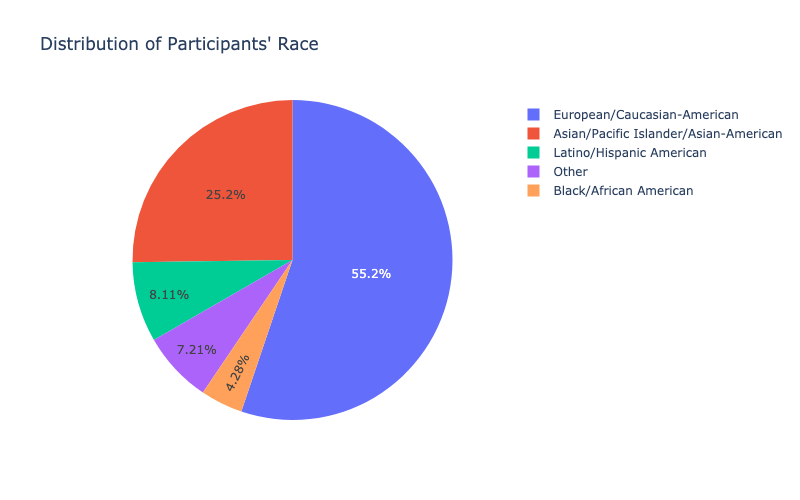

In [22]:
# Describe participants' race

grouped_race_cat = df.groupby('race_cat')['iid'].nunique().reset_index()
grouped_race_cat.columns = ['race_cat', 'count']  
display(grouped_race_cat)

# Create a pie chart
fig = px.pie(grouped_race_cat, names='race_cat', values='count', 
             title="Distribution of Participants' Race", width=WIDTH)
#fig.show()

fig.write_image("images/race_distribution.png", width = WIDTH)
Image(filename="images/race_distribution.png")

,goal_cat,count
0,Fun night out,180
2,Meet new people,157
1,Get a date,34
5,To say I did it,30
3,Other,26
4,Serious relationship,16


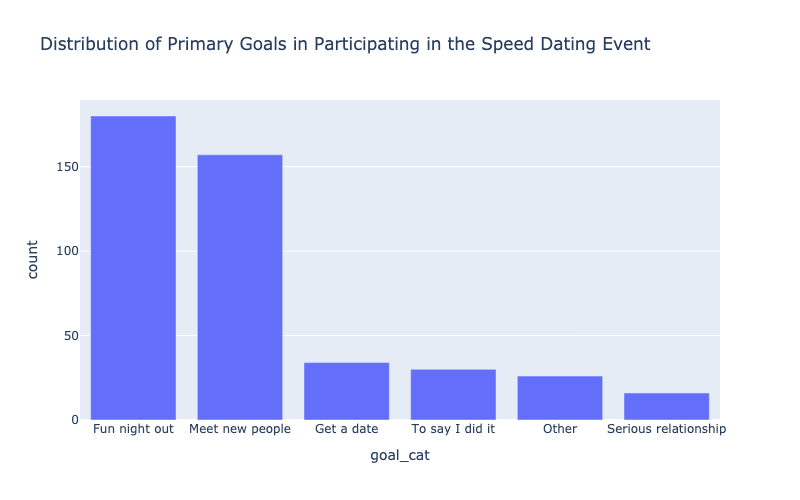

In [23]:
# Get the counts for each goal category

grouped_goal_cat = df.groupby('goal_cat')['iid'].nunique().reset_index()
grouped_goal_cat.columns = ['goal_cat', 'count'] 

# Sort in descending order by count
grouped_goal_cat = grouped_goal_cat.sort_values(by='count', ascending=False)

display(grouped_goal_cat)

# Create a pie chart
fig = px.bar(grouped_goal_cat, x='goal_cat', y='count', 
             title="Distribution of Primary Goals in Participating in the Speed Dating Event",width=WIDTH)
#fig.show()

fig.write_image("images/goals_distribution.png", width = WIDTH)
Image(filename="images/goals_distribution.png")

,date_cat,count
0,Almost never,79
4,Several times a year,108
1,Once a month,78
5,Twice a month,108
2,Once a week,43
6,Twice a week,20
3,Several times a week,6


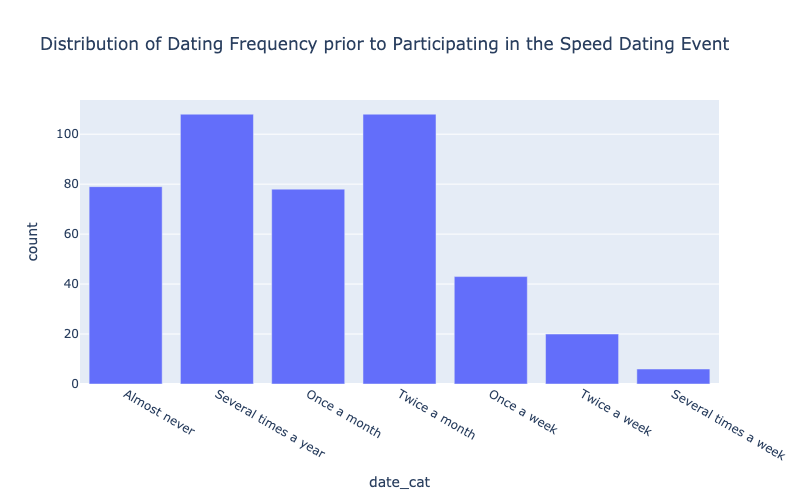

In [24]:
# Get the counts for each dating freq category

# Define the custom order for date_cat
ordered_date_cats = [
    'Almost never',
    'Several times a year',
    'Once a month',
    'Twice a month',
    'Once a week',
    'Twice a week',
    'Several times a week'
]

grouped_date_cat = df.groupby('date_cat')['iid'].nunique().reset_index()
grouped_date_cat.columns = ['date_cat', 'count'] 

grouped_date_cat['date_cat'] = pd.Categorical(grouped_date_cat['date_cat'], categories=ordered_date_cats, ordered=True)
grouped_date_cat = grouped_date_cat.sort_values('date_cat')

display(grouped_date_cat)

# Create a pie chart
fig = px.bar(grouped_date_cat, x='date_cat', y='count', 
             title="Distribution of Dating Frequency prior to Participating in the Speed Dating Event",width=WIDTH)
#fig.show()

fig.write_image("images/datefreq_distribution.png", width = WIDTH)
Image(filename="images/datefreq_distribution.png")


## 📊 Step 3: Exploratory data analysis

### **1. What participant and partner characteristics are most associated with a mutual match, saying yes to a date and going on a second date?**

In [25]:
# How many matches did participants get ?
df_match = df.groupby('iid')['match'].value_counts()
df_match.describe()

count    814.000000
mean       8.373464
std        6.180204
min        1.000000
25%        3.000000
50%        7.000000
75%       14.000000
max       22.000000
Name: count, dtype: float64

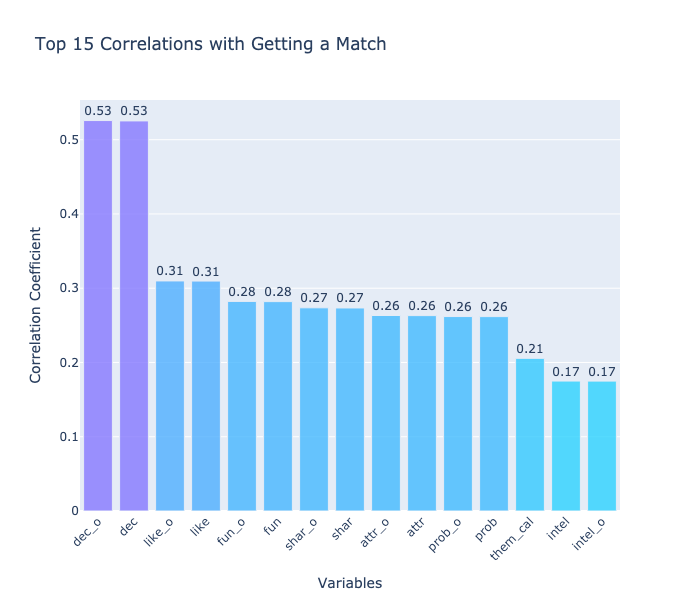

In [26]:
# Check for top correlations between variables
# Function to calculate top correlations and prepare DataFrame with colors
def prepare_correlation_data(df, target, top_n=15):
    correlations = df.corr(numeric_only=True)[target].dropna().sort_values(key=abs, ascending=False)[1:top_n + 1]
    df_corr = correlations.reset_index().rename(columns={'index': 'Variable', target: 'Correlation'})
    df_corr['Color'] = df_corr['Correlation'].apply(
        lambda x: f'rgba({int(255 * abs(x))}, {int(255 * (1 - abs(x)))}, {255 if x > 0 else 0}, 0.8)'
    )
    return df_corr

# Function to create a bar plot
def create_correlation_plot(df_corr, title):
    fig = px.bar(
        df_corr,
        x='Variable',
        y='Correlation',
        title=title,
        text='Correlation',
        color='Color',
        color_discrete_map='identity',
        labels={'Correlation': 'Correlation Coefficient', 'Variable': 'Variables'}
    )
    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_line_width=1)
    fig.update_layout(xaxis_tickangle=-45, height=600)
    return fig

# Prepare data and plots
filenames = ["match_correlations.png", "yesdate_correlations.png", "seconddate_correlations.png"]

for target, title, filename in zip(['match', 'dec', 'date_3'], 
                                   ["Top 15 Correlations with Getting a Match",
                                    "Top 15 Correlations with Saying Yes to a Date",
                                    "Top 15 Correlations with Likelihood of Second Date"],
                                   filenames):
    df_corr = prepare_correlation_data(df, target)
    fig = create_correlation_plot(df_corr, title)
    #fig.show()
    fig.write_image(f"images/{filename}")

Image(filename="images/match_correlations.png")

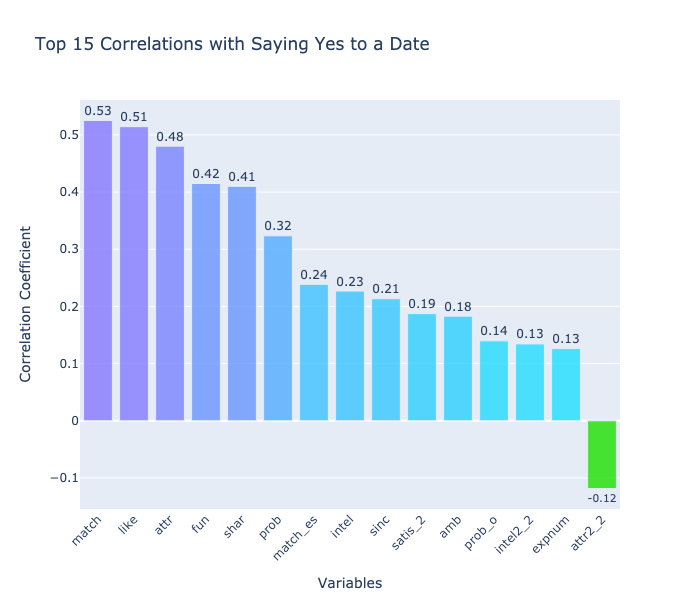

In [27]:
Image(filename="images/yesdate_correlations.png")


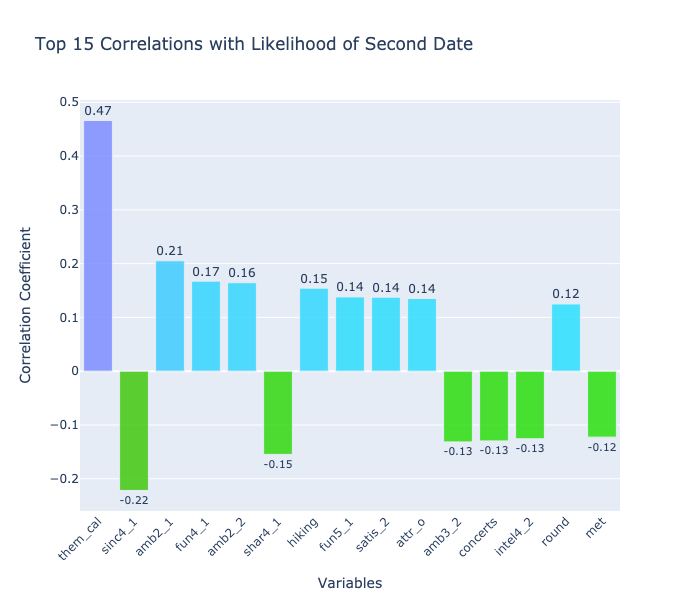

In [29]:
Image(filename="images/seconddate_correlations.png")

#### **Key Findings:**

* **💘 Getting a Match**:

Among the top factors linked to a mutual match (excluding obvious mutual decisions and liking each other):

-> Participants were more likely to match when their partner rated them as fun (fun_o, 28%), attractive (attr_o, 26%), or having shared hobbies/interests (shar_o, 27%).

-> Participants' own ratings of the other person as fun (fun, 28%), attractive (attr, 26%), and similar in interests (shar, 26%) were also associated with match likelihood.

-> Expected partner interest (prob_o, 26%) and perceived probability of being liked (prob, 26%) played meaningful roles.

-> Intelligence ratings from both sides (intel, intel_o) had weaker correlations (~17%), suggesting more subtle influence.


* **✅ Saying Yes to a Date**:

Factors most associated with saying “Yes” to a date (excluding obvious reasons such as liking the person):

-> Rating the partner as attractive (attr, 48%), fun (fun, 42%), and having shared interests (shar, 41%).

-> Belief that the partner would reciprocate (prob, 32%) also influenced the decision.

-> Additional influences included how intelligent (intel, 21%), sincere (sinc, 19%), and ambitious (amb, 18%) the person was perceived to be.

* **💬 Going on a Second Date**:

For those who matched, key factors linked to actually going on a second date included:

-> Whether the partner contacted them afterwards (them_cal, 47%), showing that logistical follow-up was critical.

-> Participants who valued intelligence in a partner halfway through the event (intel_s, 35%) and those who prioritized ambition (amb2_1, amb2_2) were more likely to go on a second date.

-> Interestingly, sincerity as an ideal trait (sinc4_1, −0.22) had a negative correlation, suggesting a gap between stated preferences and actual behavior.

### **2. Does sharing the same race or having similar interests significantly increase the likelihood of a match?**

In [30]:
# Match rate by whether participants were of the same race
same_race_data = df[['samerace', 'match', 'iid']].dropna().drop_duplicates() # participant-level data
match_by_samerace = same_race_data.groupby('samerace')['match'].mean().reset_index()
match_by_samerace.columns = ['samerace', 'match_rate']
display(match_by_samerace)


,samerace,match_rate
0,0,0.381415
1,1,0.372642


In [31]:
# Bin int_corr into similarity levels
df['int_corr_bin'] = pd.cut(df['int_corr'], bins=[-1, -0.5, 0, 0.5, 1], 
                            labels=['Very Low', 'Low', 'Moderate', 'High'])

# Match rate by int_corr_bin
int_corr_data = df[['int_corr_bin', 'int_corr','match', 'iid']].dropna().drop_duplicates() # participant-level data
match_by_corr = df.groupby('int_corr_bin')['match'].mean().reset_index()
match_by_corr.columns = ['Interest Similarity', 'match_rate']
display(match_by_corr)


/var/folders/g2/7q8py5px6xqbgjxm64g6_xcc0000gp/T/ipykernel_55399/4124618197.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Interest Similarity,match_rate
0,Very Low,0.097561
1,Low,0.161476
2,Moderate,0.155929
3,High,0.200345


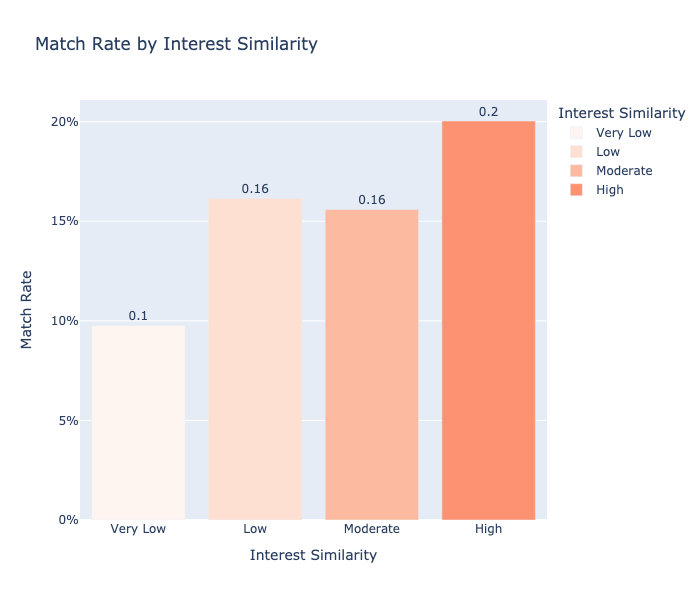

In [32]:
# Ensure the order of categories for consistent coloring
match_by_corr['Interest Similarity'] = pd.Categorical(
    match_by_corr['Interest Similarity'],
    categories=['Very Low', 'Low', 'Moderate', 'High'],
    ordered=True
)

# Plot using red sequential colors (light to dark)
fig = px.bar(
    match_by_corr.sort_values('Interest Similarity'),
    x='Interest Similarity',
    y='match_rate',
    text=match_by_corr['match_rate'].round(2),
    labels={'match_rate': 'Match Rate'},
    title='Match Rate by Interest Similarity',
    color='Interest Similarity',
    color_discrete_sequence=px.colors.sequential.Reds
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_tickformat='.0%',
    xaxis_title='Interest Similarity',
    yaxis_title='Match Rate',
    height=600,
    width=700
)
#fig.show()
fig.write_image("images/match_by_similarity.png")
Image(filename="images/match_by_similarity.png")

#### **Key Findings:**

- Sharing racial background did not appear to play a significant role in the likelihood of a match. Indeed, participants from different racial backgrounds even had slightly higher match rates (38%) than those of the same race (37%)

- Sharing similar interests, however, appeared to have some impact on match rates. Indeed, as the correlation in interests increases, so does the likelihood of a match. Participants with very high shared interests matched at a rate twice as high (20%) than those with very low similarity (10%).



### **3. Do participants who rate themselves as more attractive receive more contact from matches afterwards ?**

,attr3_1,them_call_cat,count,proportion
0,3.0,They were called,1,0.200000
1,3.0,They were not called,4,0.800000
2,4.0,They were called,1,0.166667
3,4.0,They were not called,5,0.833333
4,5.0,They were called,3,0.187500
5,5.0,They were not called,13,0.812500
6,6.0,They were called,6,0.272727
7,6.0,They were not called,16,0.727273
8,7.0,They were called,23,0.396552
9,7.0,They were not called,35,0.603448


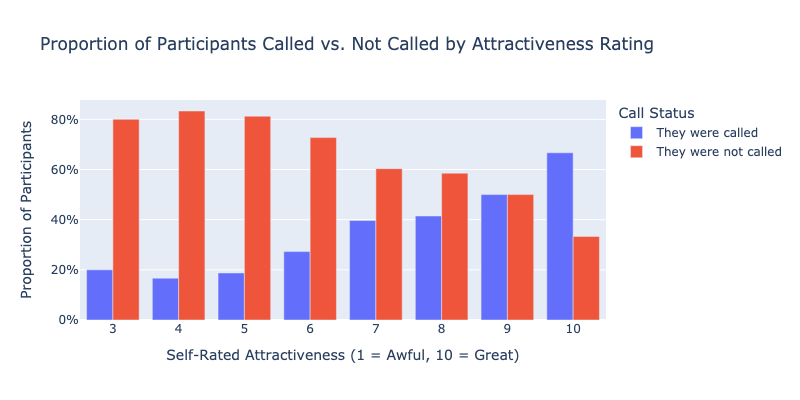

In [33]:
# Data preparation
post_event_data = df[['attr3_1', 'them_cal', 'iid']].dropna().drop_duplicates() # participant-level data

# Map call categories
post_event_data['them_call_cat'] = post_event_data['them_cal'].map({1: 'They were called', 0: 'They were not called'})

# Group data and calculate counts
grouped_data = (post_event_data.groupby(['attr3_1', 'them_call_cat'])
                .size()
                .reset_index(name='count'))

# Calculate proportions
total_counts = grouped_data.groupby('attr3_1')['count'].transform('sum')
grouped_data['proportion'] = grouped_data['count'] / total_counts
display(grouped_data)

# Bar plot with proportions
fig = px.bar(
    grouped_data,
    x='attr3_1',
    y='proportion',
    color='them_call_cat',
    title='Proportion of Participants Called vs. Not Called by Attractiveness Rating',
    labels={
        'attr3_1': 'Self-Rated Attractiveness (1 = Awful, 10 = Great)',
        'proportion': 'Proportion of Participants',
        'them_call_cat': 'Call Status'
    },
    barmode='group',
    height=HEIGHT, width=WIDTH,
    category_orders={'attr3_1': list(range(0, 11))}  # Ensure correct x-axis order
)

# Update layout
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(0, 11))),
    yaxis=dict(tickformat='.0%')  # Format y-axis as percentage
)

# Show the plot
#fig.show()
fig.write_image("images/attractiveness_vs_calls.png", width = WIDTH, height = HEIGHT)
Image(filename="images/attractiveness_vs_calls.png")

#### **Key Findings:**

- Participants who rated themselves higher in attractiveness were  more likely to be called back by their matches.

- The proportion of participants who were called increased steadily from attractiveness rating 4 onward.

- Among those who rated themselves a 10, 65% were contacted, compared to only 20% or less for ratings of 3–5.

- Participants with lower self-perceived attractiveness were overwhelmingly not contacted (80–85% of the time).

### **4. Does the timing of an interaction affect the likelihood of being chosen or matched?**

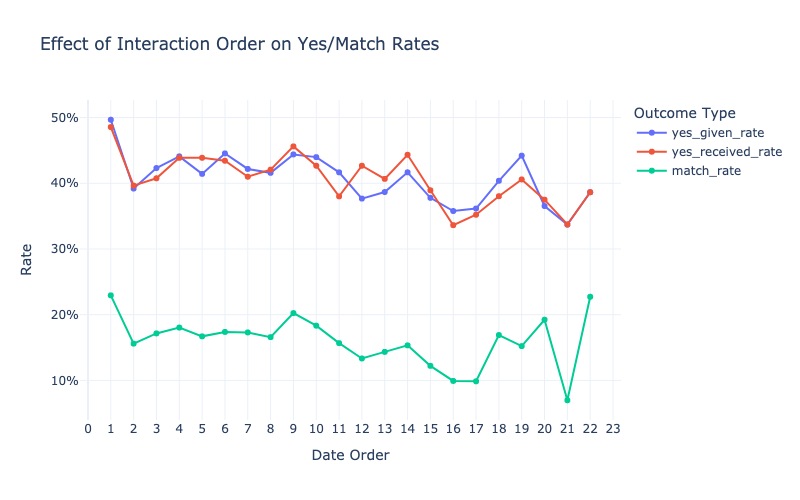

In [34]:
# Drop missing values in relevant columns
df_order = df[['order', 'dec', 'dec_o', 'match']].dropna()

# Group by 'order' (1st, 2nd, ..., Nth date) and calculate acceptance/match rates
order_effects = df_order.groupby('order').agg(
    yes_given_rate=('dec', 'mean'),
    yes_received_rate=('dec_o', 'mean'),
    match_rate=('match', 'mean'),
    count=('dec', 'count')
).reset_index()

# Plotting all 3 in one figure for easier comparison
fig = px.line(
    order_effects,
    x='order',
    y=['yes_given_rate', 'yes_received_rate', 'match_rate'],
    title='Effect of Interaction Order on Yes/Match Rates',
    labels={'value': 'Rate', 'order': 'Date Order'},
    markers=True
)

fig.update_layout(
    yaxis_tickformat='.0%',
    height=500,
    width=800,
    legend_title_text='Outcome Type',
    xaxis=dict(dtick=1),
    template='plotly_white'
)

#fig.show()
fig.write_image("images/dateorder_matchrates.png")
Image(filename="images/dateorder_matchrates.png")


#### **Key Findings:**

- Early interactions (Order 1) showed the highest rates of both saying “Yes” and receiving a “Yes” (~50%), along with the highest match rate (~23%).

- As the event progressed, both yes_given and yes_received rates generally fluctuated around 40–45%, with a slight decline mid-event.

- Match rates showed a more pronounced decline over time, reaching their lowest levels around Order 16–17, with some fluctuations.

- Interestingly, all three rates increased again toward the final few interactions, possibly reflecting participants' desire to maximize opportunities before the event ends.

### **5. What traits are most valued amongst men vs. women?**

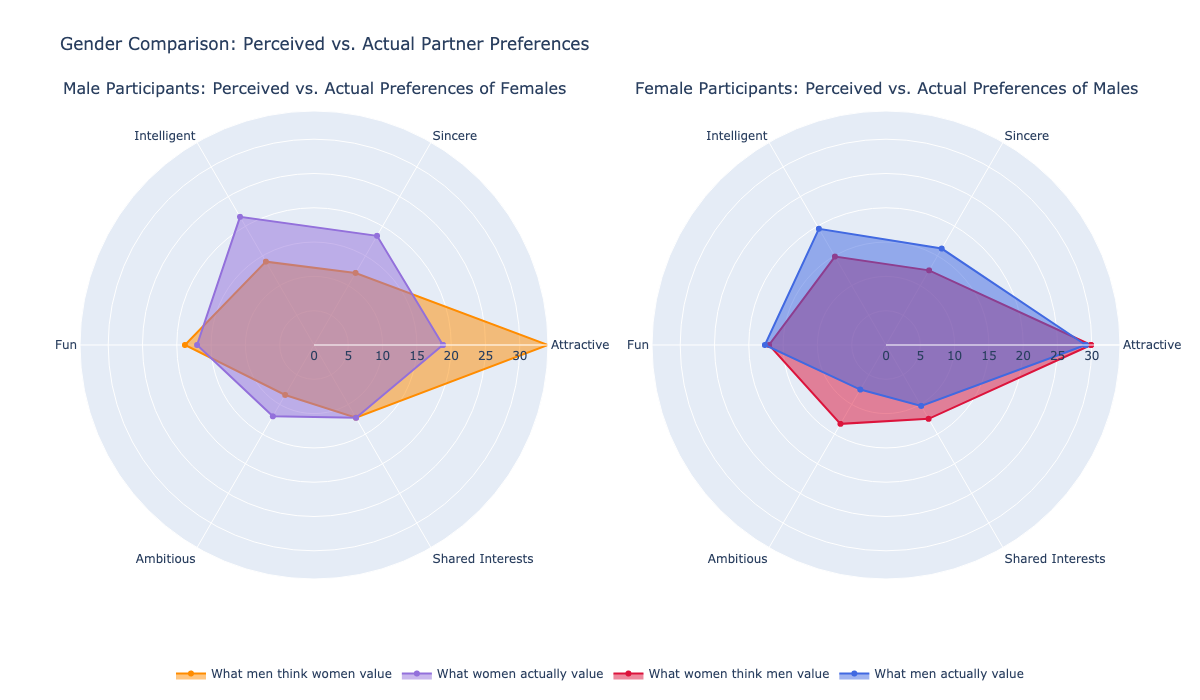

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Traits and labels
traits = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
labels = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']
traits_loop = labels + [labels[0]]

# Mean values
male_actual = df[df['gender'] == 1][[f'{t}1_1' for t in traits]].mean().tolist()
male_thinks_female = df[df['gender'] == 1][[f'{t}4_1' for t in traits]].mean().tolist()

female_actual = df[df['gender'] == 0][[f'{t}1_1' for t in traits]].mean().tolist()
female_thinks_male = df[df['gender'] == 0][[f'{t}4_1' for t in traits]].mean().tolist()

# Loop around for radar chart
male_actual += [male_actual[0]]
male_thinks_female += [male_thinks_female[0]]
female_actual += [female_actual[0]]
female_thinks_male += [female_thinks_male[0]]

# Create subplot with polar domains
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}, {'type': 'polar'}]],
                    subplot_titles=[
                        "Male Participants: Perceived vs. Actual Preferences of Females",
                        "Female Participants: Perceived vs. Actual Preferences of Males"
                    ])

# Left chart (male participants)
fig.add_trace(go.Scatterpolar(
    r=male_thinks_female,
    theta=traits_loop,
    fill='toself',
    name="What men think women value",
    line=dict(color='darkorange')
), row=1, col=1)

fig.add_trace(go.Scatterpolar(
    r=female_actual,
    theta=traits_loop,
    fill='toself',
    name="What women actually value",
    line=dict(color='mediumpurple')
), row=1, col=1)

# Right chart (female participants)
fig.add_trace(go.Scatterpolar(
    r=female_thinks_male,
    theta=traits_loop,
    fill='toself',
    name="What women think men value",
    line=dict(color='crimson')
), row=1, col=2)

fig.add_trace(go.Scatterpolar(
    r=male_actual,
    theta=traits_loop,
    fill='toself',
    name="What men actually value",
    line=dict(color='royalblue')
), row=1, col=2)

# Layout
fig.update_layout(
    title_text="Gender Comparison: Perceived vs. Actual Partner Preferences",
    height=700,
    width=1200,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    ),
    polar=dict(radialaxis=dict(visible=True, range=[0, max(male_actual + female_actual) + 5])),
    polar2=dict(radialaxis=dict(visible=True, range=[0, max(male_actual + female_actual) + 5]))
)

#fig.show()

fig.write_image("images/perceived_vs_actualpref_bygender.png")
Image(filename="images/perceived_vs_actualpref_bygender.png")



#### **Key Findings:**

- **👨 Male Participants**

-> Men believe women prioritize attractiveness much more than they actually do.

-> They tend to underestimate how much females value intelligence, sincerity and ambition.

- **👩 Female Participants**

-> Women correctly believe that men heavily prioritize attractiveness.

-> However they tend to overestimate the value of ambition among men's eyes, and underestimate intelligence and sincerity.


### **6. What factors are predictors of going on a second date?**

In [37]:
df['date_3'].value_counts()

date_3
0.0    1848
1.0    1183
Name: count, dtype: int64

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       552
         1.0       0.89      0.99      0.93       358

    accuracy                           0.95       910
   macro avg       0.94      0.95      0.94       910
weighted avg       0.95      0.95      0.95       910



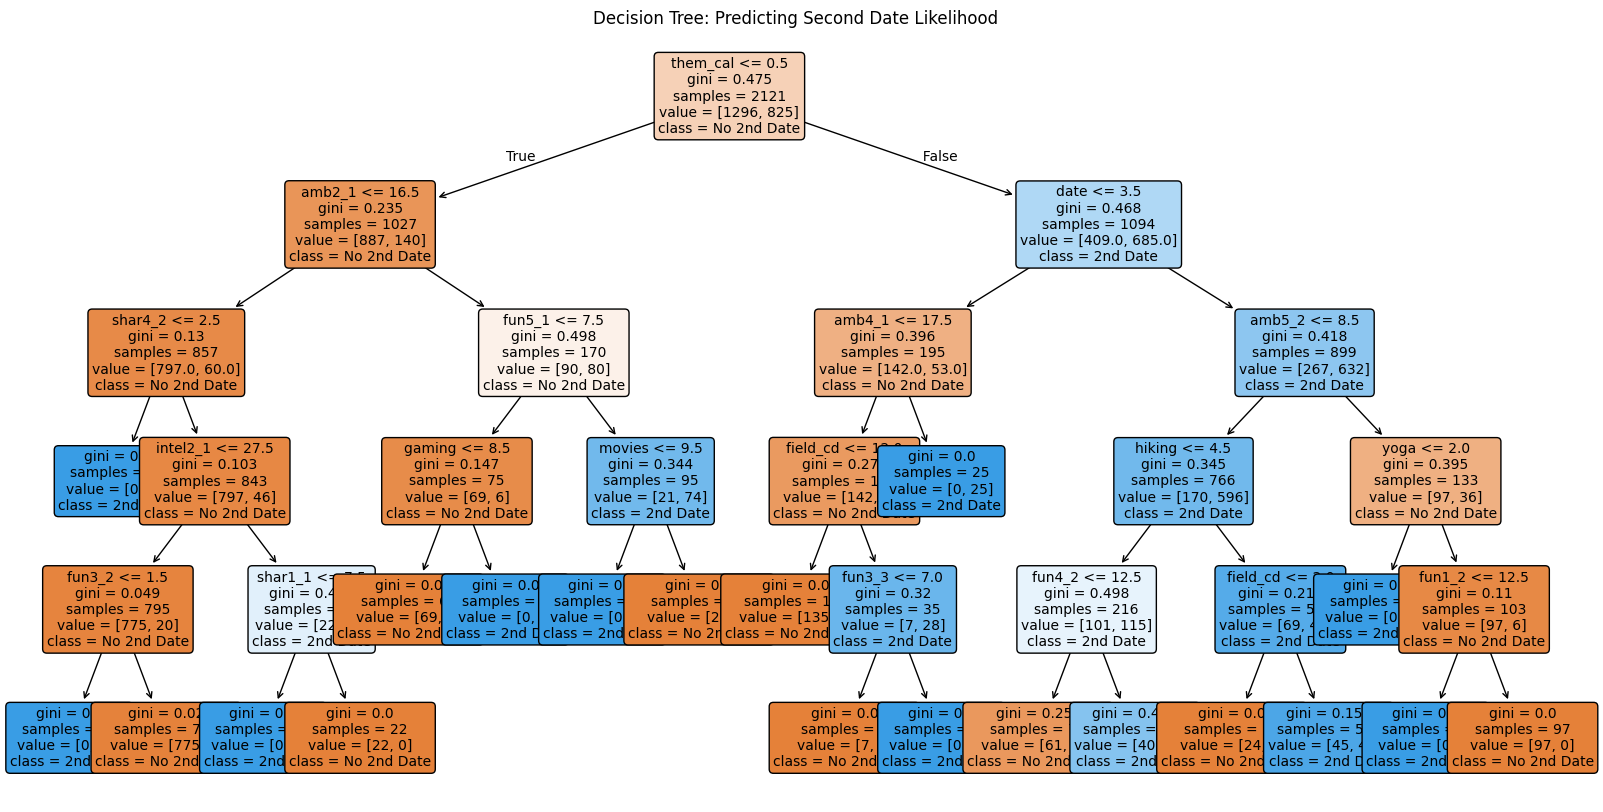

<Figure size 640x480 with 0 Axes>

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# --- Step 1: Prepare the dataset ---

# Drop rows where the target is missing
df_tree = df.dropna(subset=['date_3']).copy()

# --- Step 2: Define columns to exclude ---
excluded_cols = {
    'iid', 'id', 'idg', 'partner', 'pid', 'wave', 'gender', 'date_3',  # IDs and target
    'from', 'zipcode', 'career', 'undergrd'  # free-text or unstructured features
}

# Get only numeric features that are not in excluded list
numeric_cols = df_tree.select_dtypes(include='number').columns
features = [col for col in numeric_cols if col not in excluded_cols]

# Impute missing values in selected features with the median
for col in features:
    df_tree[col] = df_tree[col].fillna(df_tree[col].median())

# Drop rows with missing target (should already be done earlier)
df_tree = df_tree.dropna(subset=['date_3'])

# Define X and y
X = df_tree[features]
y = df_tree['date_3']

# --- Step 3: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Step 4: Fit the Decision Tree ---
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# --- Step 5: Evaluate ---
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# --- Step 6: Visualize the Tree ---
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=['No 2nd Date', '2nd Date'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree: Predicting Second Date Likelihood")
plt.show()

plt.savefig("images/decision_tree_second_date.png")


#### **Key Findings:**

The decision tree reveals several important insights into the factors that influence whether two matched participants go on a second date:

- **🔑 1. Follow-up is Critical**

-> The most important predictor was whether the participant was contacted by their match after the event (them_cal).

-> Participants who were contacted were significantly more likely to go on a second date.

- **❤️ 2. Personal Traits Matter**

-> Ambition appeared multiple times in the tree (amb2_1, amb5_2, amb4_1), suggesting that participants’ own ambitions and how they perceive others’ ambition plays a role.

-> Shared interests (shar1_1, shar4_2) and being perceived as fun (fun3_2, fun1_2) also contributed to second-date likelihood.

- **💬 3. Social & Lifestyle Factors**

-> Activities like hiking, yoga, and gaming showed up in splits, indicating that lifestyle alignment and hobbies may influence second-date interest.

- **📚 4. Dating Habits**

-> Participants who reported going on dates more frequently (date) were more likely to go on a second date, possibly due to being more socially active or open to new connections.

- **🎓 5. Education Field**

-> The participant's field of study (field_cd) appeared in the tree, suggesting some influence of academic background, possibly as a proxy for shared values or communication style.

## 💡 Step 4: Interpretation & Insights


The speed dating experiment offers a rich lens into human attraction, initial decision-making, and post-event follow-up. Across the five research questions, several consistent themes emerged about what sparks mutual interest — and where perception may diverge from reality.

#### **1. What drives initial attraction and mutual matches?**
- Mutual matches were most likely when participants rated each other highly on fun, attractiveness, and shared interests. Notably, both partner and own ratings mattered — suggesting that attraction is not just about being liked, but also about how much the participant liked the other.

- However, intelligence and sincerity, while often cited as desirable traits, showed weaker associations with actual matching. This reflects a possible disconnect between stated preferences and real-time decision behavior during dates.

#### **2. Do shared characteristics (race or interests) matter?**
- Contrary to assumptions, racial similarity did not predict higher match rates. In fact, participants from different racial backgrounds matched slightly more often, hinting at the open-mindedness of daters.

- However, interest similarity did have a clear impact. Match rates doubled for participants with very high shared interests compared to those with very low overlap — highlighting the value of aligned lifestyles or hobbies.

#### **3. Does self-perceived attractiveness predict post-date contact?**
- Yes — self-rated attractiveness was positively associated with being contacted after the event. Participants who rated themselves highly (especially 10/10) were far more likely to be followed up with.

- This may reflect actual attractiveness, confidence during interactions, or perceived compatibility, but it underscores how self-perception can influence social outcomes, even after the initial match.

#### **4. Does timing affect dating success?**
- Order effects were observed: participants were most generous and engaged during the first dates, with “Yes” and match rates peaking in the earliest interactions.

- As the event progressed, interest levels slightly declined, possibly due to decision fatigue or saturation. However, an uptick in engagement near the end suggests a recency effect — or participants giving more chances as the event wraps up.

#### **5. How accurate are perceptions of what the opposite sex values?**
- Clear gender gaps emerged in how participants perceived vs. what the opposite sex actually valued:

- Men overestimated how much women value physical attractiveness, and underestimated traits like sincerity, intelligence, and ambition.

- Women accurately predicted that men highly prioritize attractiveness, but overestimated the value men place on ambition, while underestimating sincerity and intelligence.

- These perception gaps may contribute to mismatched expectations in dating and can inform how dating platforms frame profile prompts or compatibility signals.

#### **6. What predicts whether a match leads to a second date?**
- A decision tree analysis revealed that post-date follow-up (e.g., being contacted) was the strongest predictor of a second date.

- Other influential factors included:

-> Participants' own ambition levels

-> Their preferences for traits like fun, shared interests, and sincerity

-> Hobbies (e.g., hiking, yoga, gaming) and dating frequency

-> Even academic background played a role — suggesting that second-date interest involves more than just first impressions, and taps into broader lifestyle and personality alignment.
 
### **Conclusion**
* Attraction is complex and multi-dimensional. While fun and looks often dominate initial impressions, long-term interest — even for a second date — is shaped by mutual effort, shared values, and clear follow-up.

* By unpacking these dynamics, this analysis not only reveals what sparks interest during speed dating but also provides Tinder with actionable insights for designing smarter match suggestions, profile cues, and post-match nudges to foster deeper connections.